In [10]:
filepath = "/Users/rugi/Documents/geospatial_exercise"

In [ ]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt

# Function to merge raster files
def merge_rasters(raster_files, output_path):
    src_files_to_mosaic = []
    for fp in raster_files:
        src = rasterio.open(fp)
        src_files_to_mosaic.append(src)

    mosaic, out_trans = merge(src_files_to_mosaic)
    
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_trans
    })
    
    with rasterio.open(output_path, "w", **out_meta) as dest:
        dest.write(mosaic)
    
    return output_path


# List of raster files to merge
raster_files = [
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_092719_78_24ab_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_093034_23_24af_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_093036_31_24af_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101821_00_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101823_21_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101825_43_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101827_64_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101829_86_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101854_04_24bd_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101856_26_24bd_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101858_48_24bd_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101900_70_24bd_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_102111_28_24df_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_102113_48_24df_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_102115_69_24df_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_102117_89_24df_3B_Visual_clip.tif',

    # Add more raster file paths as needed
]

# Path to the output merged raster file
output_path = 'berlin_merged_raster.tif'

# Merge rasters
merged_raster_path = merge_rasters(raster_files, output_path)


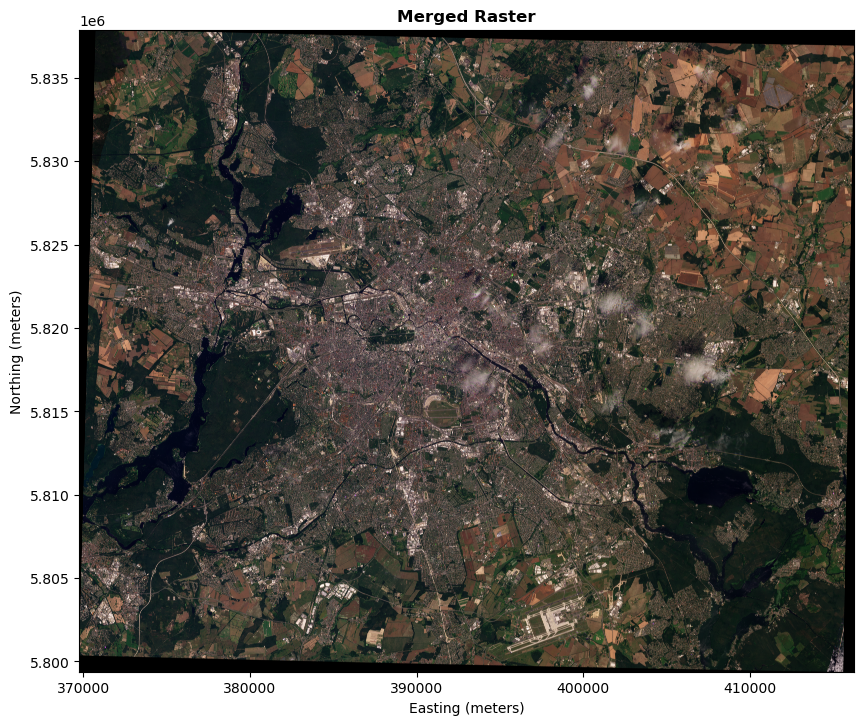

In [25]:

#plot merged raster
def plot_raster(raster_path):
    with rasterio.open(raster_path) as src:
        fig, ax = plt.subplots(figsize=(10, 10))
        show(src, ax=ax, title="Berlin Merged Raster")
        ax.set_xlabel("Longitude (degrees)" if src.crs.is_geographic else "Easting (meters)")
        ax.set_ylabel("Latitude (degrees)" if src.crs.is_geographic else "Northing (meters)")
        plt.show()

# Example usage
plot_raster('berlin_merged_raster.tif')


/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_9768/1831453850.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(shapefile_path, driver='ESRI Shapefile')


Shapefile saved to berlin_osm_shapefile.shp


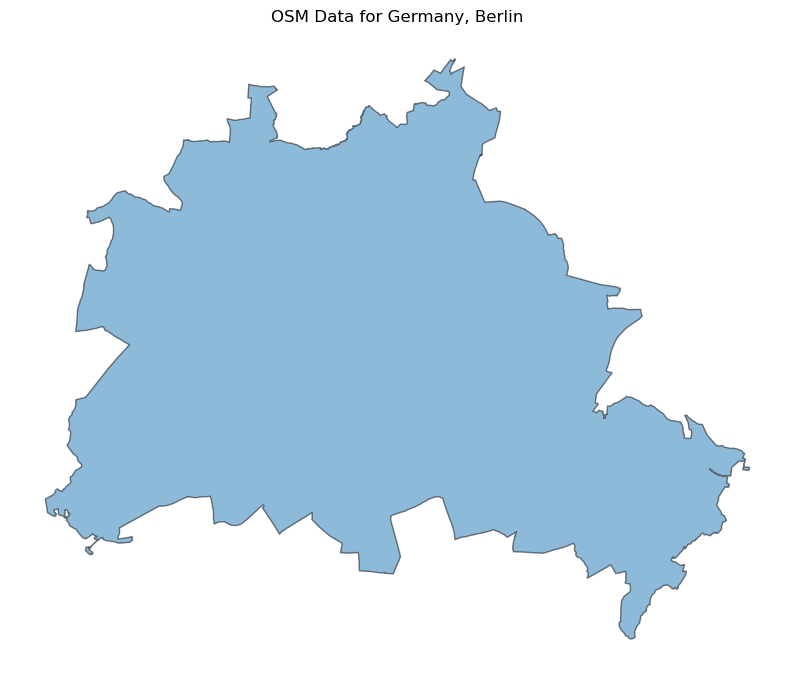

Plot saved to berlin_osm_plot.png


In [16]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def download_and_plot_osm_data(place_name, shapefile_path, plot_path):
    """
    Downloads OpenStreetMap data for a specified place, saves it as a shapefile, and plots the data.

    Parameters:
    - place_name: str, name of the place to download the data for (e.g., "Germany, Berlin").
    - shapefile_path: str, path to the output shapefile.
    - plot_path: str, path to the output plot image.
    """
    # Download the data
    gdf = ox.geocode_to_gdf(place_name)
    
    # Save the data as a shapefile
    gdf.to_file(shapefile_path, driver='ESRI Shapefile')
    print(f"Shapefile saved to {shapefile_path}")

    # Plot the data
    ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
    plt.title(f"OSM Data for {place_name}")
    plt.axis('off')

    # Save the plot
    plt.savefig(plot_path, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    print(f"Plot saved to {plot_path}")

# Define the place name, shapefile path, and plot path
place_name = 'Germany, Berlin'
shapefile_path = 'berlin_osm_shapefile.shp'
plot_path = 'berlin_osm_plot.png'

# Download, save, and plot the data
download_and_plot_osm_data(place_name, shapefile_path, plot_path)


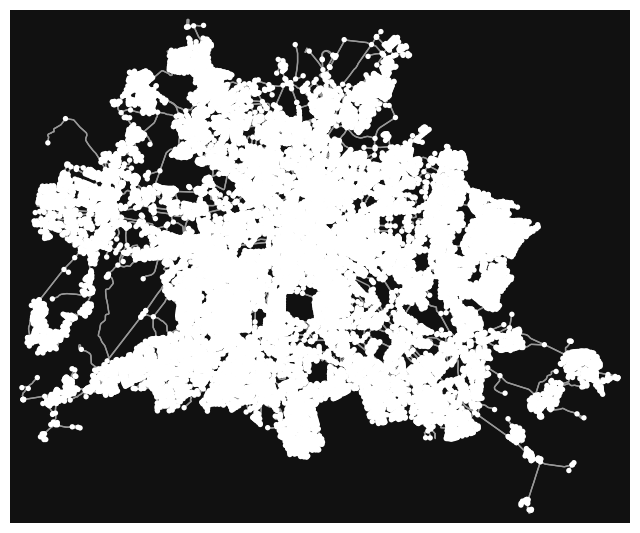

In [33]:
# create a graph of a place's drivable street network then plot it
road = ox.graph_from_place('Berlin, Germany', network_type='drive')
fig, ax = ox.plot_graph(road)

prj_road = ox.project_graph(road)

road = ox.graph_from_place('Berlin, Germany')
ox.plot_graph(road)


In [19]:
# save the network model to disk as a shapefile and graphml
ox.save_graph_shapefile(road, filepath = r'/Users/rugi/Documents/geospatial_exercise/OSMdata')

/Applications/anaconda3/envs/autogis/lib/python3.11/site-packages/osmnx/io.py:87: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  warnings.warn(
/Applications/anaconda3/envs/autogis/lib/python3.11/site-packages/osmnx/io.py:114: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


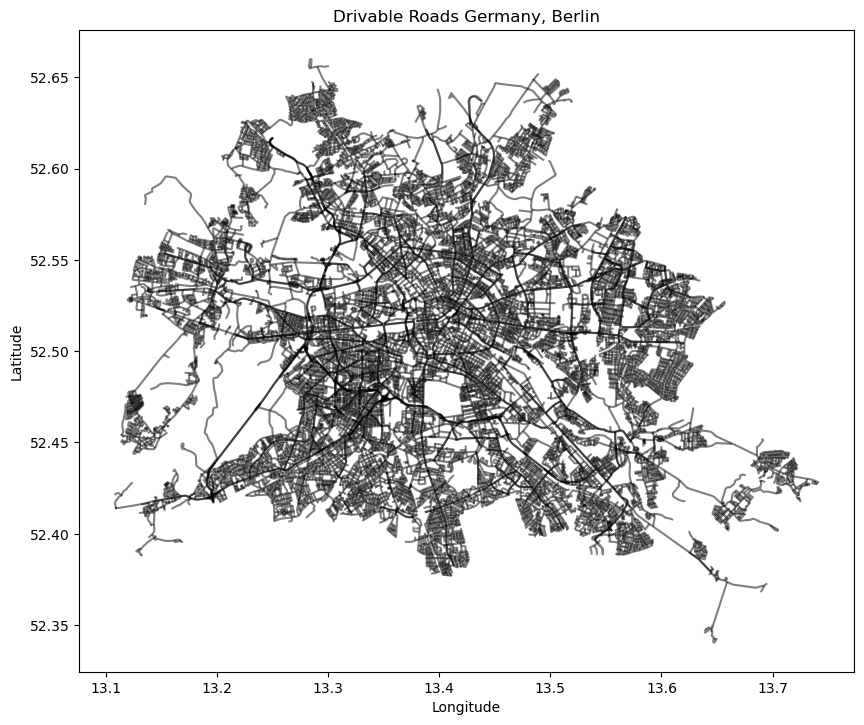

In [85]:

# Function to load and plot a shapefile
def plot_shapefile(shapefile_path):
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Plot the shapefile
    gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
    plt.title(f"Drivable Roads {place_name}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Path to your shapefile
shapefile_path = '/Users/rugi/Documents/geospatial_exercise/OSMdata/edges.shp'

# Plot the shapefile
plot_shapefile(shapefile_path)


In [26]:
# Step 1: Import and read satellite imagery and OSM data
satellite_image_path = 'berlin_merged_raster.tiff'
osm_data_path = '/Users/rugi/Documents/geospatial_exercise/OSMdata/edges.shp'

In [100]:
# impute speed on all edges missing data
road = ox.add_edge_speeds(road)

# see mean speed/time values by road type
#edges mean roads
edges = ox.graph_to_gdfs(road, nodes=False)
edges["highway"] = edges["highway"].astype(str)
edges.groupby("highway")[["length", "speed_kph"]].mean().round(1)

,length,speed_kph
highway,,
"['living_street', 'residential']",239.7,29.1
"['living_street', 'unclassified']",245.0,30.0
"['motorway_link', 'motorway']",756.6,65.3
"['motorway_link', 'primary_link', 'motorway']",326.3,50.0
"['motorway_link', 'primary_link']",311.0,55.0
"['motorway_link', 'secondary']",251.2,56.7
"['primary', 'motorway']",452.0,63.0
"['primary', 'trunk']",302.7,50.0
"['primary_link', 'primary']",542.7,44.0


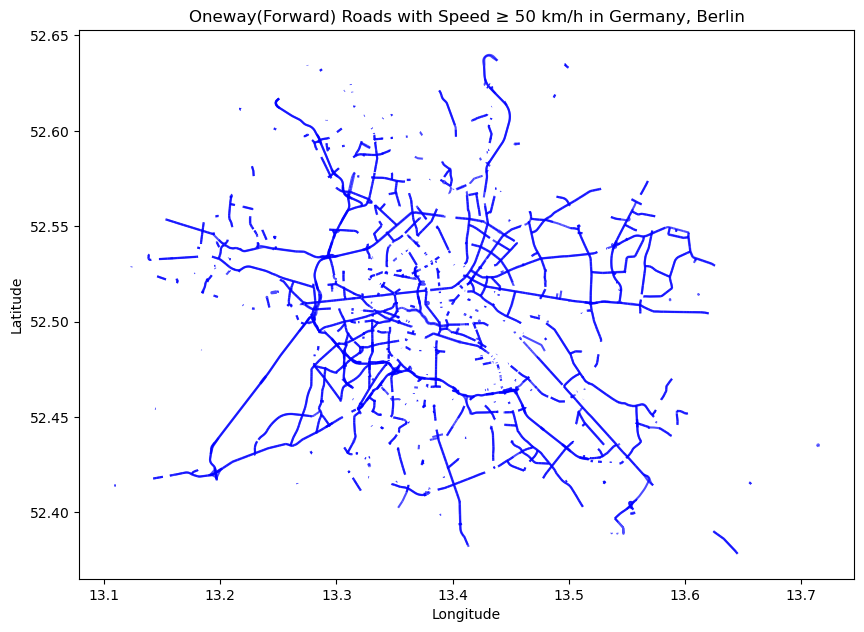

In [101]:
#set the speed threshold in kph
speed_threshold = 50

# Filter out highways with speed greater than or equal to the threshold and direction of travel is forward
filtered_roads = edges[(edges["speed_kph"] >= speed_threshold) & (edges["oneway"] == True)]

# Plot the filtered highways
ax = filtered_roads.plot(figsize=(10, 10), alpha=0.7, edgecolor='b')
plt.title(f"Oneway(Forward) Roads with Speed ≥ {speed_threshold} km/h in {place_name}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_9768/3878950335.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_edges['buffered'] = filtered_edges['geometry'].buffer(20)
/Applications/anaconda3/envs/autogis/lib/python3.11/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_9768/3878950335.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-

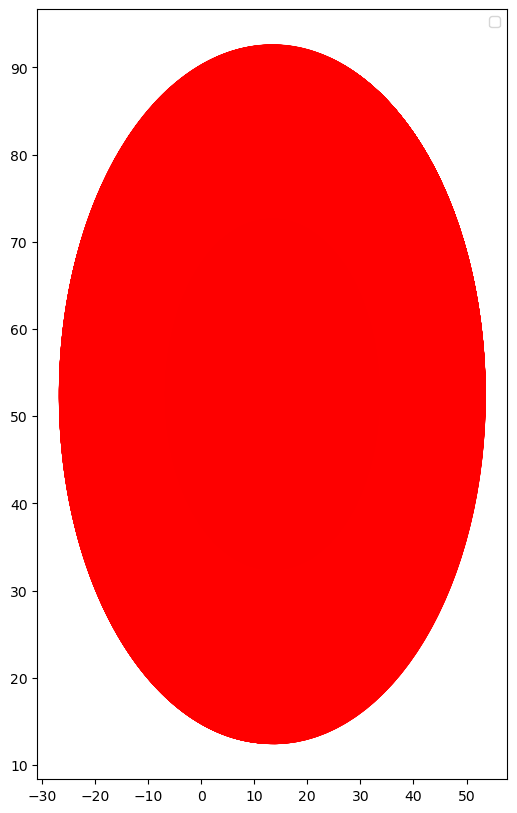

In [52]:
from shapely.geometry import LineString

# Read the shapefile
#filtered_edges = gpd.read_file('path/to/your/line_shapefile.shp')

# Apply a buffer to the line shapefile (let's say 10 units buffer)
filtered_edges['buffered'] = filtered_edges['geometry'].buffer(20)

# Plot the original and buffered geometries
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot original lines
filtered_edges.plot(ax=ax, color='blue', label='Original')

# Plot buffered lines
filtered_edges.set_geometry('buffered').plot(ax=ax, color='red', alpha=0.5, label='Buffered')

# Set legend
plt.legend()

# Save the plot to a file
#plt.savefig('buffered_shapefile_plot.png')

# Save the buffered shapefile to a new file
#buffered_gdf = filtered_edges.set_geometry('buffered')
#buffered_gdf.to_file('path/to/save/buffered_shapefile.shp')

# Show the plot
plt.show()


In [ ]:

# Step 3: Buffer the road centreline by 20 meters
buffered_roads = filtered_roads.copy()
buffered_roads['geometry'] = filtered_roads['geometry'].buffer(20)

# Step 4: Clip satellite imagery
with rasterio.open(satellite_image_path) as src:
    out_image, out_transform = mask(src, buffered_roads.geometry, crop=True)
    out_meta = src.meta.copy()

# Step 5: Reproject clipped raster data to EPSG:25833
dst_crs = 'EPSG:25833'
transform, width, height = calculate_default_transform(
    src.crs, dst_crs, src.width, src.height, *src.bounds)
out_meta.update({
    "crs": dst_crs,
    "transform": transform,
    "width": width,
    "height": height
})

reprojected_image_path = 'reprojected_image.tif'
with rasterio.open(reprojected_image_path, 'w', **out_meta) as dst:
    reproject(
        source=rasterio.band(src, 1),
        destination=rasterio.band(dst, 1),
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=dst_crs,
        resampling=Resampling.nearest)

# Step 6: Tile reprojected image into 512x512 pixel patches
with rasterio.open(reprojected_image_path) as src:
    for i in range(0, src.height, 512):
        for j in range(0, src.width, 512):
            window = rasterio.windows.Window(j, i, 512, 512)
            transform = src.window_transform(window)
            out_meta = src.meta.copy()
            out_meta.update({
                "height": 512,
                "width": 512,
                "transform": transform
            })
            tiled_image_path = f'tiled_image_{i}_{j}.jpg'
            with rasterio.open(tiled_image_path, 'w', **out_meta) as dst:
                dst.write(src.read(window=window))

# Document the process
with open("process_documentation.txt", "w") as file:
    file.write("Steps to process the data:\n")
    file.write("1. Downloaded satellite imagery and OSM data.\n")
    file.write("2. Filtered roads with speed >= 50 km/h and forward direction.\n")
    file.write("3. Buffered roads by 20 meters on each side.\n")
    file.write("4. Clipped satellite imagery with buffered roads.\n")
    file.write("5. Reprojected clipped imagery to EPSG:25833.\n")
    file.write("6. Tiled reprojected image into 512x512 pixel patches.\n")
    file.write("7. Saved the graph of Berlin.\n")